In [1]:
from InstagramAPI import InstagramAPI
import requests
import pandas as pd
import time
from time import gmtime, strftime
import functions
import random

Fail to import moviepy. Need only for Video upload.


In [10]:
# api = InstagramAPI("kkkkartinki", "nzDFENghrKsg7CZ")
# api.login()

In [ ]:
# api.follow()

In [5]:
# api.getTotalFollowers('546224532')

In [4]:
# functions.getTotalFollowers(api), '546224532')

In [3]:
class InstaBot:
    def __init__(self, username, password, target_user = None):
        """username (str), password (str), target_user (str)"""
        self.username = username #set username
        self.password = password #set password
        api = InstagramAPI(username, password) # provide login information
        api.login() #login
        self.uID = functions.getID(api) # get current user ID number
        if target_user is not None: #to get information about the target user if specified
            self.tID = functions.get_usr_id(target_user) #get target user ID number
            self.target_u_followers = functions.getTotalFollowers(api, self.tID) #get target user followers
            self.len = len(self.target_u_followers) #count length
        self.hist = list(functions.get_history().followed_hist) # get history of followings
        self.histtime = list(functions.get_history().datetime)
        self.followings = functions.getTotalFollows(api, self.uID) # get list of users already followed
        self.followers = functions.getTotalFollowers(api, self.uID) # get list of users follow current user
        
        
    def promote(self, N):
        """N - number of randomly chosen accounts among followers of target user"""
        to_follow = []
        indices = []
        iter_ = 0
        # get numbet of accounts to choose for following
        if type(N) != int:
            print("Введите, пожалуйста, целое число:")
            N = int(input())
        if N >= self.len: #check for not being out of range
            print(f"Число слишком большое. Введите число менее {self.len}:")
            N = int(input())
        #  choose unique N indicies for accounts to follow
        while len(to_follow)<N:
            if iter_ < N*2:
                i = random.randint(0, N)
                if i not in indices:
                    indices.append(i)
                    to_follow.append(self.target_u_followers[i])
                    iter_ += 1
            else:
                break
        
        to_follow_clear = []
        for name in to_follow:
            #check for presense in history
            if (name not in self.followings) and (name not in self.hist):
                to_follow_clear.append(name)
        if len(to_follow_clear) < N/2:
            print(f"Было отобрано менее 50% от запрошенного числа. Большое число имен идентичны тем, на которые аккаунт подписан либо безрезультано был подписан ранее.")# Повторить поиск? Введите Да или Нет")

        self.to_follow_clear = to_follow_clear
        
        print(f"Введите 'Да', чтобы подписаться на {len(to_follow_clear)} аккаунтов:")
        action = input()
        if action == 'Да':
            date_current = strftime("%Y-%m-%d %H:%M:%S", gmtime())
            api = InstagramAPI(self.username, self.password)
            api.login()
            functions.follow_user_list(api, to_follow_clear)
            new_hist = self.hist
            new_hist.extend(to_follow_clear)
            new_datetime = self.histtime
            for i in range(len(to_follow_clear)):
                new_datetime.append(date_current)
            excel_file = pd.read_excel("History.xlsx")
            excel_file["followed_hist"] = new_hist
            excel_file["datetime"] = new_datetime
            excel_file.to_excel("History.xlsx")
            print("Готово!")
        
        return to_follow_clear
    
    def remove_nonreciprocal(self, mode = "all"):
        """
        mode = "all" (defualt) means unfollow all unmutual no matter for how long you follow them
        other options: "by_datetime"
        """
        non_mutuals = []
        if mode = "all":
            for user in self.hist:
                if user not in self.followers: #choose not mutual
                    non_mutuals.append(user)
        
        return non_mutuals
                

In [4]:
bot = InstaBot("kkkkartinki", "nzDFENghrKsg7CZ", target_user="mulla_.2")

# Those messages are always present, but the result is success so they can be ignored
# The're a part of source code of the package function

#Request return 405 error!
#{'message': '', 'status': 'fail'}
#Request return 404 error!

Request return 429 error!
{'message': 'Please wait a few minutes before you try again.', 'status': 'fail'}
Request return 405 error!
{'message': '', 'status': 'fail'}
Request return 404 error!
Login success!



In [6]:
bot.len

358

In [7]:
bot.followers

[]

In [8]:
bot.followings

['instagram', 'amberrose']

In [9]:
bot.hist

[]

In [10]:
bot.password

'nzDFENghrKsg7CZ'

In [11]:
bot.tID

'28974293539'

In [12]:
len(bot.target_u_followers)

358

In [13]:
bot.target_u_followers[:100]

['jimmym_99',
 'first_playa',
 'dengwebber',
 '_amal_noushad_',
 '_bnyamin_63',
 'esther_madreviajera',
 'angellielizabeth',
 '_grace_danny_',
 'dj.fratt',
 'ert.1up',
 'daud_170',
 'elisabalagova',
 'privvvv_mel_niki',
 '___b1.___',
 'bhadbxtch8',
 'mohammedsameerquadri',
 '_angelina067',
 'your_babyy_gyal',
 '_armando_mikula',
 'krishdewa__',
 'trendinguk',
 'aaishap_2706',
 'tamannaadil_02',
 'most_wantedsav12',
 'yxng.sadiya',
 'arham_raees',
 'millez_1',
 'aaliyahxx_priv',
 '_.m4tthew',
 'fariya_rafixx',
 'chefkissmemes',
 'semaylmz220',
 'yogesh._singh_',
 'benz_aufff',
 'ukdripdoctor',
 '_saam0305',
 'ma.rianne_13',
 '_fidel_barrerez_cat',
 'alexxharlem_',
 '_a_cats_world',
 'jpck.23',
 'kami.london',
 'mareyvillafuerte',
 'irvarnaaa.xo',
 'ismatjusab',
 '_simonaa_17',
 'sxdz_x',
 'emran_1225',
 'amirahh_k.xox',
 '__devil_irfan___',
 'ii_yxf',
 'madalin_vancea_',
 'evangalinee_',
 'ruqiyaxhussein',
 'maiab29',
 'sandra.godlovax',
 'renyy._14',
 'ricardoturtak_',
 'nazaha_458',
 

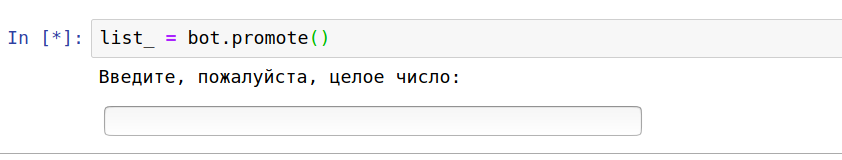

In [17]:
list_ = bot.promote(50)

In [18]:
list_

['4_24_6',
 'paparazzii777',
 'anya_kuzmenkova',
 'manata_27',
 'maria_sumlinova',
 'olesya_fv',
 'almirnasyrov',
 'olgaerofeeva123',
 'innal2206',
 '_yamshikova_',
 'annanovikova1393',
 'odna_takaya1503',
 's_moskovkina',
 'tatromb',
 'sapeginasvetlanasergeevna',
 'viktoriyaarbuzova',
 'happy_successful_and_loved',
 'comofazer.cursos',
 'evgeniya_pastukhova',
 'lidia_cherli',
 'lokky007',
 'ta_chto_v_lesakh',
 'potapovanatalia42890',
 'alice88807',
 'mikhalchukann',
 'tsavro_natalia',
 'slo_luna',
 's.vetlanka1994',
 'nata_snig',
 'ekaterinafedorova_',
 'maria.taradonova',
 'katy_chin_chin',
 'netvoyesobachyedeloo',
 'andrey_dvoeglazov',
 'bulygina24',
 'nadya_dudorova',
 'i_inga21',
 'amor__________fati',
 'anewsuperhero',
 'p_anton86',
 'kotovrass',
 'stogova771',
 'id.someone',
 'slvolkov',
 'lz_lesa',
 'olga_ligacheva',
 'lochmatova_nata',
 'gorochkina_13',
 'svetlanazhikhareva',
 'kasatka757']